In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from collections import defaultdict
from IPython.display import clear_output
import time

# Load dataset
data = pd.read_csv(r"E:\Data Science\wabtech\synthetic_train_data.csv")
print("Dataset Loaded Successfully")
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Data Science\\wabtech\\synthetic_train_data.csv'

In [ ]:
# Initialize RL Environment for Train Scheduling
class TrainSchedulingEnv:
    def __init__(self, trains, actions, time_limit):
        self.trains = trains
        self.actions = actions  # ['stay', 'move fast', 'move slow']
        self.time_limit = time_limit
        self.current_time = 0
        self.state = None
        self.reset()

    def reset(self):
        self.current_time = 0
        self.state = {train: 0 for train in self.trains}  # Each train starts at position 0
        return self.state

    def step(self, action):
        reward = 0
        done = False

        for train, act in zip(self.trains, action):
            if act == 1:  # move fast
                self.state[train] += 2
                reward += 10
            elif act == 2:  # move slow
                self.state[train] += 1
                reward += 5
            else:  # stay
                reward -= 1

        self.current_time += 1
        if self.current_time >= self.time_limit:
            done = True
        return self.state, reward, done

In [ ]:
# Define Q-Learning Agent
class QLearningAgent:
    def __init__(self, actions, learning_rate=0.1, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.995):
        self.actions = actions
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.q_table = defaultdict(lambda: np.zeros(len(actions)))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(len(self.actions))  # Explore
        state_tuple = tuple(state.items())
        return np.argmax(self.q_table[state_tuple])  # Exploit

    def learn(self, state, action, reward, next_state, done):
        state_tuple = tuple(state.items())
        next_state_tuple = tuple(next_state.items())
        q_predict = self.q_table[state_tuple][action]
        q_target = reward + (self.gamma * np.max(self.q_table[next_state_tuple]) * (not done))
        self.q_table[state_tuple][action] += self.lr * (q_target - q_predict)

In [ ]:
# Visualization Functions
def plot_rewards(rewards):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, label="Total Reward Per Episode", color='green')
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Training Rewards Over Episodes")
    plt.legend()
    plt.grid()
    plt.show()

def plot_positions(train_positions):
    plt.figure(figsize=(12, 6))
    for train, positions in train_positions.items():
        plt.plot(positions, label=f"Train {train}")
    plt.xlabel("Steps")
    plt.ylabel("Position")
    plt.title("Train Positions Over Time")
    plt.legend()
    plt.grid()
    plt.show()

def plot_q_table(agent):
    q_values_matrix = np.array([list(values) for _, values in agent.q_table.items()])
    if q_values_matrix.shape[1] > 0:
        plt.figure(figsize=(8, 6))
        sns.heatmap(q_values_matrix, annot=True, cmap="YlGnBu", cbar=True)
        plt.title("Q-Table Heatmap")
        plt.xlabel("Actions")
        plt.ylabel("States")
        plt.show()
    else:
        print("Q-Table is empty, no heatmap generated.")

def plot_action_distribution(actions_log):
    plt.figure(figsize=(8, 6))
    plt.hist(actions_log, bins=len(set(actions_log)), rwidth=0.8, color='orange')
    plt.xlabel("Actions")
    plt.ylabel("Frequency")
    plt.title("Action Distribution During Training")
    plt.xticks(range(len(actions_log)))
    plt.grid()
    plt.show()

Episode 100, Total Reward: 10000, Epsilon: 0.6058


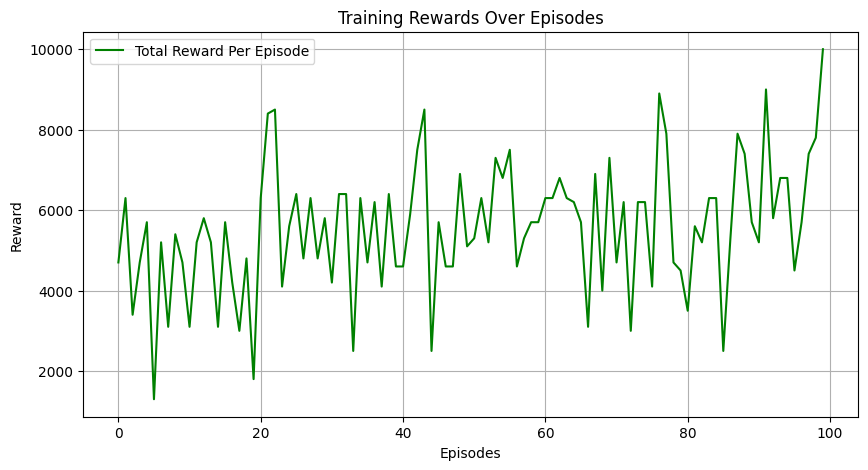

Training Complete


In [ ]:
# Initialize Environment and Agent
time_limit = 10
env = TrainSchedulingEnv(trains=data['Train ID'].unique(), actions=['stay', 'move fast', 'move slow'], time_limit=time_limit)
agent = QLearningAgent(actions=['stay', 'move fast', 'move slow'])

# Training Loop
n_episodes = 100
reward_history = []
train_positions = {train: [] for train in env.trains}  # Track train positions
actions_log = []  # Log actions chosen

for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = [agent.choose_action(state)] * len(env.trains)
        actions_log.extend(action)
        next_state, reward, done = env.step(action)
        agent.learn(state, action[0], reward, next_state, done)
        state = next_state
        total_reward += reward

        # Track positions
        for train in env.trains:
            train_positions[train].append(state[train])

    reward_history.append(total_reward)
    agent.epsilon *= agent.epsilon_decay  # Decay epsilon

    if (episode + 1) % 50 == 0:
        clear_output(wait=True)
        print(f"Episode {episode+1}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.4f}")
        plot_rewards(reward_history)

print("Training Complete")

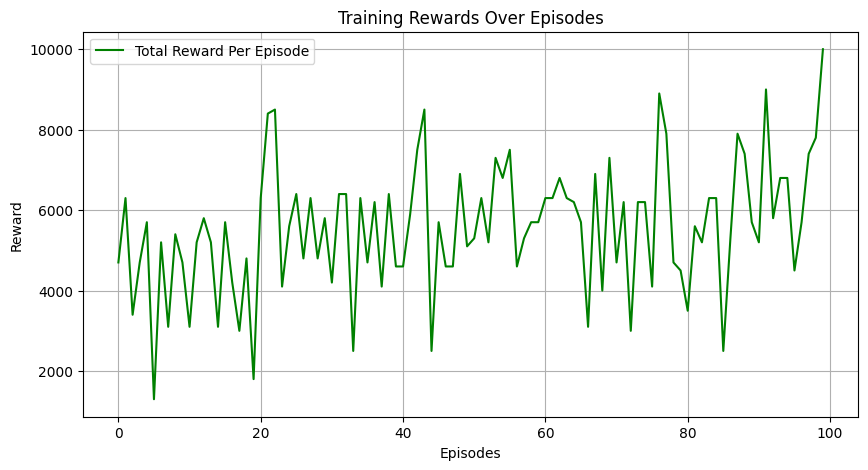

In [ ]:
# Final Visualization
plot_rewards(reward_history)


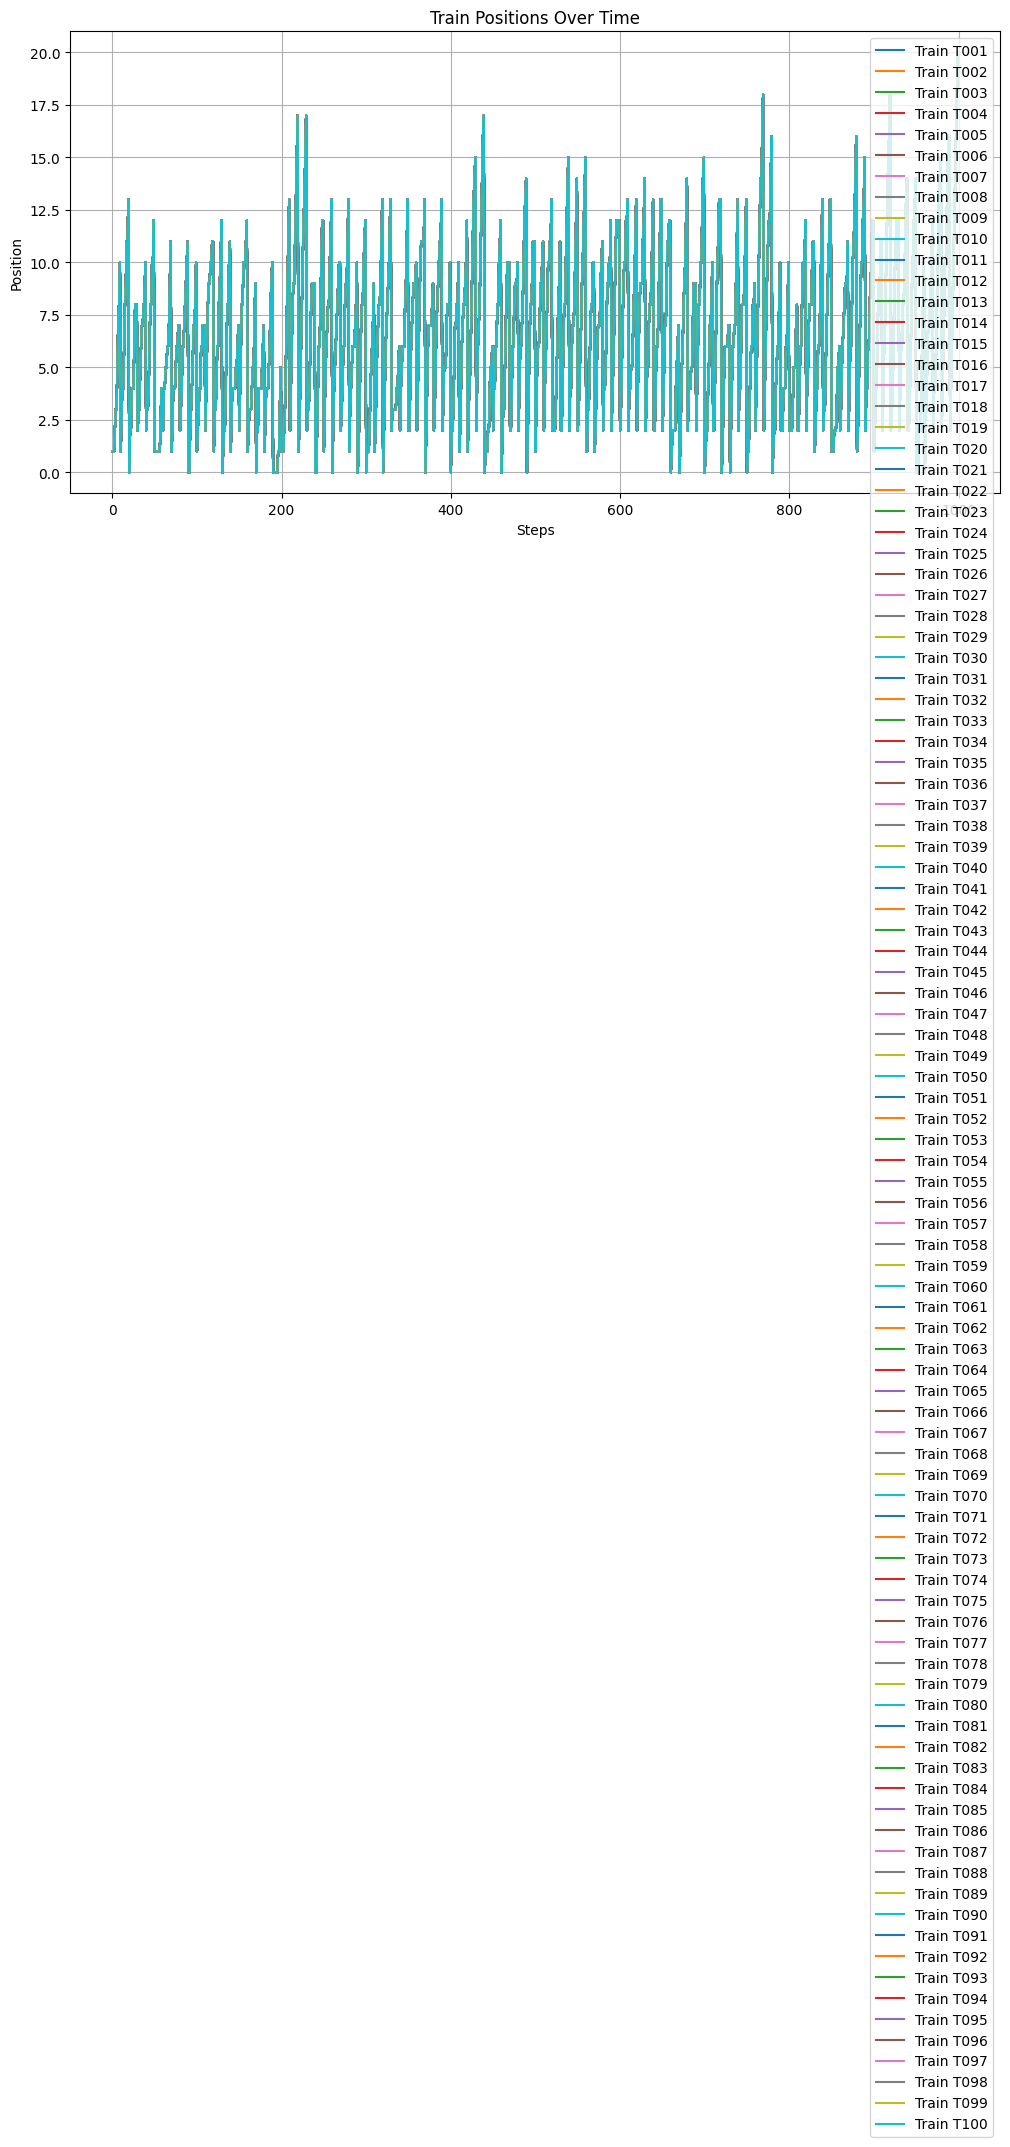

In [ ]:
plot_positions(train_positions)


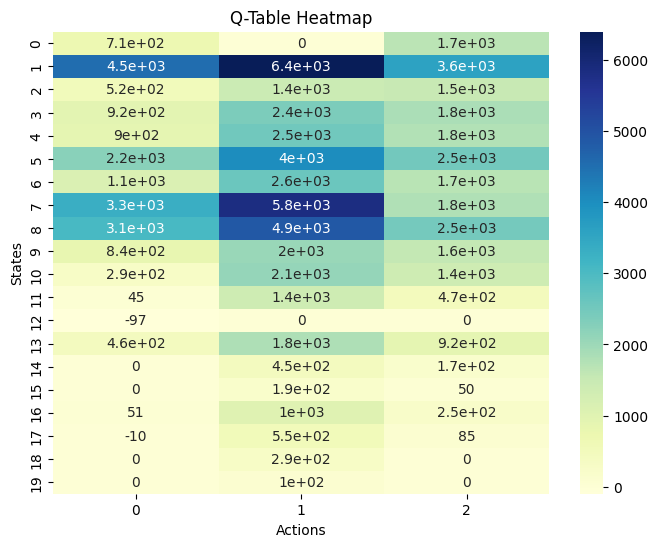

In [ ]:
plot_q_table(agent)


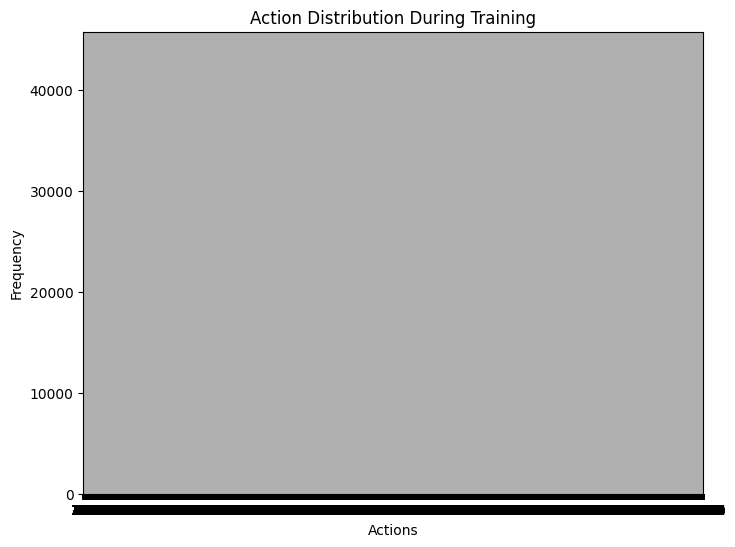

In [ ]:
plot_action_distribution(actions_log)

In [ ]:
# Sample Q-Table
print("\nSample Q-Table:")
for state, actions in list(agent.q_table.items())[:5]:
    print(f"State: {state}, Q-Values: {actions}")




Sample Q-Table:
State: (('T001', 1), ('T002', 1), ('T003', 1), ('T004', 1), ('T005', 1), ('T006', 1), ('T007', 1), ('T008', 1), ('T009', 1), ('T010', 1), ('T011', 1), ('T012', 1), ('T013', 1), ('T014', 1), ('T015', 1), ('T016', 1), ('T017', 1), ('T018', 1), ('T019', 1), ('T020', 1), ('T021', 1), ('T022', 1), ('T023', 1), ('T024', 1), ('T025', 1), ('T026', 1), ('T027', 1), ('T028', 1), ('T029', 1), ('T030', 1), ('T031', 1), ('T032', 1), ('T033', 1), ('T034', 1), ('T035', 1), ('T036', 1), ('T037', 1), ('T038', 1), ('T039', 1), ('T040', 1), ('T041', 1), ('T042', 1), ('T043', 1), ('T044', 1), ('T045', 1), ('T046', 1), ('T047', 1), ('T048', 1), ('T049', 1), ('T050', 1), ('T051', 1), ('T052', 1), ('T053', 1), ('T054', 1), ('T055', 1), ('T056', 1), ('T057', 1), ('T058', 1), ('T059', 1), ('T060', 1), ('T061', 1), ('T062', 1), ('T063', 1), ('T064', 1), ('T065', 1), ('T066', 1), ('T067', 1), ('T068', 1), ('T069', 1), ('T070', 1), ('T071', 1), ('T072', 1), ('T073', 1), ('T074', 1), ('T075', 1), 

In [ ]:
# Final Summary
average_reward = np.mean(reward_history[-100:])
print(f"\nAverage Reward over last 100 episodes: {average_reward:.2f}")


Average Reward over last 100 episodes: 5548.00
